In [1]:
# Importing the librairies
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Let's create a new database
dsc540_project = "dsc540_project.db"

# Let's connect to the database. If it does not exist, it will be created
conn = sqlite3.connect(dsc540_project)

# Closing the connection
conn.close()

In [3]:
# Creating the table suicide_rates
# Let's connect to the database
conn = sqlite3.connect(dsc540_project)

# Let's create a cursor to for the sql command
cursor = conn.cursor()

# Schema of the suicide_rates table
table_suicide_rates ="""
CREATE TABLE IF NOT EXISTS suicide_rates (
    Country TEXT PRIMARY KEY,
    Region TEXT,
    Year INTEGER,
    Gender TEXT,
    Suicide_Count INTEGER
);
    """

# Let's execute the query to create the table suicide_rates
cursor.execute(table_suicide_rates)

# Let's read the datasets from the csv into a pandas dataframe
suicide_rates = pd.read_csv('suicide_rates.csv')

# Inserting the data into the tables
suicide_rates.to_sql('suicide_rates', conn, if_exists='replace', index=False)

# Commit the change
conn.commit()

# Closing the connection
conn.close()

In [4]:
# Creating the table country_population
# Let's connect to the database
conn = sqlite3.connect(dsc540_project)

# Let's create a cursor to for the sql command
cursor = conn.cursor()

# Schema of the country_population table
country_population ="""
CREATE TABLE IF NOT EXISTS country_population (
    Country TEXT PRIMARY KEY,
    Year INTEGER,
    Population INTEGER
);
    """

# Let's read the datasets from the csv into a pandas dataframe
suicide_rates = pd.read_csv('suicide_rates.csv')
country_population = pd.read_csv('country_population.csv')
performance_indicator = pd.read_csv('performance_indicator.csv')

# Inserting the data into the tables
country_population.to_sql('country_population', conn, if_exists='replace', index=False)

# Commit the change
conn.commit()

# Closing the connection
conn.close()

In [5]:
# Creating the table performance_indicator
# Let's connect to the database
conn = sqlite3.connect(dsc540_project)

# Let's create a cursor to for the sql command
cursor = conn.cursor()

# Schema of the performance_indicator table
performance_indicator ="""
CREATE TABLE IF NOT EXISTS performance_indicator (
    Country TEXT PRIMARY KEY,
    Year INTEGER,
    Performance REAL
);
    """

# Let's execute the query to create the tables
cursor.execute(performance_indicator)

# Let's read the datasets from the csvs into a pandas dataframe
performance_indicator = pd.read_csv('performance_indicator.csv')

# Inserting the data into the tables
performance_indicator.to_sql('performance_indicator', conn, if_exists='replace', index=False)

# Commit the change
conn.commit()

# Closing the connection
conn.close()

In [6]:
# Let's query the tables to check if there were created and populated with the data from the csv

# Connecting to the database
conn = sqlite3.connect(dsc540_project)

# Let's create a cursor to for the sql command
cursor = conn.cursor()

# Query 1
query1 = " SELECT * FROM country_population ORDER BY Country LIMIT 5;"

# Let's execute the query
cursor.execute(query1)
rows = cursor.fetchall()

# Printing the result
for row in rows:
    print(row)

# Closing the connection
conn.close()

('AFGHANISTAN', 1990, 13569000)
('AFGHANISTAN', 1995, 19446000)
('AFGHANISTAN', 2000, 22462000)
('AFGHANISTAN', 2005, 26335000)
('AFGHANISTAN', 2010, 29121000)


In [7]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)

# Let's create a cursor to for the sql command
cursor = conn.cursor()

# Query 2
query2 = " SELECT * FROM performance_indicator ORDER BY Performance DESC LIMIT 5;"

# Let's execute the query
cursor.execute(query2)
rows = cursor.fetchall()

# Printing the result
for row in rows:
    print(row)

# Closing the connection
conn.close()

('FINLAND', 2022, 93.63583333)
('NORTHERN MARIANA ISLANDS', 2022, 93.49583333)
('NORTHERN MARIANA ISLANDS', 2021, 93.49583333)
('NORTHERN MARIANA ISLANDS', 2020, 93.49583333)
('NORTHERN MARIANA ISLANDS', 2019, 93.49583333)


In [8]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)

# Let's create a cursor to for the sql command
cursor = conn.cursor()

# Query 3
query3 = " SELECT * FROM suicide_rates ORDER BY Country LIMIT 5;"

# Let's execute the query
cursor.execute(query3)
rows = cursor.fetchall()

# Printing the result
for row in rows:
    print(row)

# Closing the connection
conn.close()

('EUROPE', 'ALBANIA', 1992, 'Male', 33)
('EUROPE', 'ALBANIA', 1992, 'Female', 14)
('EUROPE', 'ALBANIA', 1993, 'Male', 46)
('EUROPE', 'ALBANIA', 1993, 'Female', 27)
('EUROPE', 'ALBANIA', 1994, 'Male', 37)


In [9]:
# Joining all the 3 tables together
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's execute the SQL query to create the new table
cursor.execute('''
CREATE TABLE IF NOT EXISTS master_table AS
SELECT sr.Region,
       sr.Country,
       sr.Year,
       sr.SuicideCount AS SuicideCount,
       sr.Gender AS Gender,
       cp.Population AS Population,
       pi.Performance AS Performance
FROM suicide_rates AS sr
JOIN country_population AS cp ON sr.Country = cp.Country AND sr.Year = cp.Year
JOIN performance_indicator AS pi ON sr.Country = pi.Country AND sr.Year = pi.Year
ORDER BY sr.Region, sr.Year;
''')

# Commit the changes
conn.commit()

In [10]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's execute the SQL query to create the new table
cursor.execute('''
CREATE TABLE IF NOT EXISTS master_table_by_region AS
SELECT sr.Region,
       sr.Year,
       SUM(sr.SuicideCount) AS TotalSuicideCount,
       SUM(cp.Population) AS TotalPopulation,
       SUM(pi.Performance) AS TotalPerformance,
       AVG(pi.Performance) AS AveragePerformance
FROM suicide_rates AS sr
JOIN country_population AS cp ON sr.Country = cp.Country AND sr.Year = cp.Year
JOIN performance_indicator AS pi ON sr.Country = pi.Country AND sr.Year = pi.Year
GROUP BY sr.Region, sr.Year
ORDER BY sr.Region, sr.Year;
''')

# Commit the changes
conn.commit()

In [11]:
from prettytable import PrettyTable

# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's create a query to retrieve the data
all_data_query = """
SELECT Year, Region, TotalSuicideCount, TotalPopulation, TotalPerformance, AveragePerformance
FROM master_table_by_region
ORDER BY Year, Region
"""

cursor.execute(all_data_query)
rows = cursor.fetchall()

# Creating a prettytable instance with the column names
table = PrettyTable()
table.field_names = ["Year", "Region", "TotalSuicideCount", "TotalPopulation", "TotalPerformance", "AveragePerformance"]

# Adding rows to the table
for row in rows:
    table.add_row(row)

# Printing the table
print(table)

# Closing the connexion to the database
conn.close()

+------+---------+-------------------+-----------------+--------------------+--------------------+
| Year |  Region | TotalSuicideCount | TotalPopulation |  TotalPerformance  | AveragePerformance |
+------+---------+-------------------+-----------------+--------------------+--------------------+
| 2005 |  AFRICA |        570        |    146969000    |    475.78791665    | 67.96970237857143  |
| 2005 | AMERICA |       29260       |    1291137000   |     3369.21875     | 60.164620535714285 |
| 2005 |   ASIA  |       45686       |    629322000    |   1885.66249996    |   58.92695312375   |
| 2005 |  EUROPE |       66865       |    966636000    | 4818.8375000000015 | 77.72318548387099  |
| 2005 | OCEANIA |        536        |     9772000     |    266.89833334    |    66.724583335    |
| 2010 |  AFRICA |        498        |    105014000    |    399.63583332    |    66.60597222     |
| 2010 | AMERICA |       31484       |    1168152000   | 3296.2716666700003 | 59.932212121272734 |
| 2010 |  

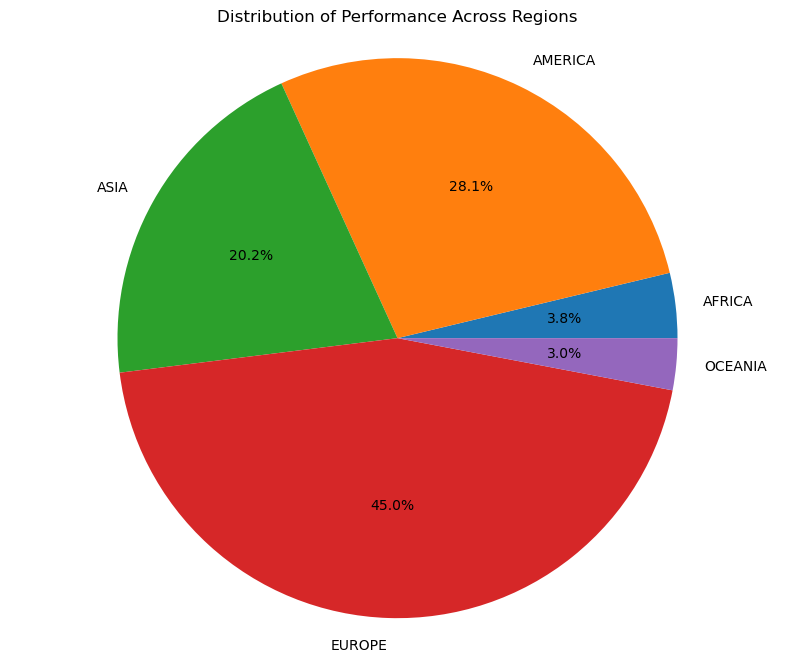

In [12]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Query to retrieve performance indicator data by region
perf_indicator_query = """
SELECT sr.Region, SUM(pi.Performance) AS Performance
FROM suicide_rates AS sr
JOIN performance_indicator AS pi ON sr.Country = pi.Country AND sr.Year = pi.Year
GROUP BY sr.Region
"""

# Let's execute the query
cursor.execute(perf_indicator_query)
results = cursor.fetchall()


# Extracting regions and performance from the results
regions = [result[0] for result in results]
performance = [result[1] for result in results]

# Creating the graph
plt.figure(figsize=(10, 8))
plt.pie(performance, labels=regions, autopct='%1.1f%%')
plt.title('Distribution of Performance Across Regions')
plt.axis('equal')
plt.show()

# Let's close the cursor and the connection to the datase
conn.close()

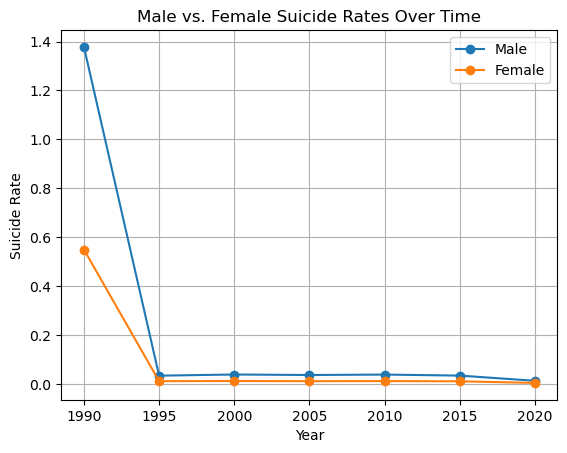

In [13]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Query to retrieve male and female suicide rates by year
male_vs_female_suicide_rate = """
SELECT sr.Year,
       SUM(CASE WHEN sr.Gender = 'Male' THEN sr.SuicideCount ELSE 0 END) * 1.0 / cp.Population AS MaleSuicideRate,
       SUM(CASE WHEN sr.Gender = 'Female' THEN sr.SuicideCount ELSE 0 END) * 1.0 / cp.Population AS FemaleSuicideRate
FROM suicide_rates AS sr
JOIN country_population AS cp ON sr.Country = cp.Country AND sr.Year = cp.Year
GROUP BY sr.Year
ORDER BY sr.Year;

"""

# Executing the query
cursor.execute(male_vs_female_suicide_rate)

# Getting the results
results = cursor.fetchall()

# Extracting years, male suicide rates, and female suicide rates from the results
years = [result[0] for result in results]
male_suicide_rates = [result[1] for result in results]
female_suicide_rates = [result[2] for result in results]

# Creating the graph
plt.plot(years, male_suicide_rates, marker='o', label='Male')
plt.plot(years, female_suicide_rates, marker='o', label='Female')
plt.title('Male vs. Female Suicide Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()
plt.grid(True)
plt.show()

# Closing the database connection
conn.close()

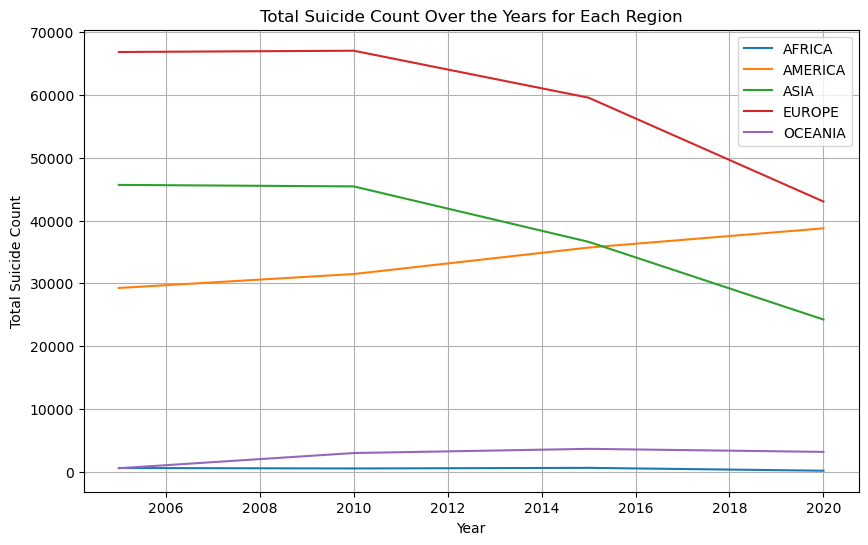

In [14]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Query to retrieve total suicide count over the years for each region
suicide_count = " SELECT Region, Year, TotalSuicideCount FROM master_table_by_region ORDER BY Region, Year;"

# Executing the query
cursor.execute(suicide_count)

# Fetching the results
results = cursor.fetchall()

# Let's create a dictionary to store the data for each region
regions = {}
for region, year, total_suicide_count in results:
    if region not in regions:
        regions[region] = {'years': [], 'total_suicide_count': []}
    regions[region]['years'].append(year)
    regions[region]['total_suicide_count'].append(total_suicide_count)

# Plotting the data into the graph
plt.figure(figsize=(10, 6))
for region, data in regions.items():
    plt.plot(data['years'], data['total_suicide_count'], label=region)

plt.title('Total Suicide Count Over the Years for Each Region')
plt.xlabel('Year')
plt.ylabel('Total Suicide Count')
plt.legend()
plt.grid(True)
plt.show()

# Closing the connection to the database
conn.close()

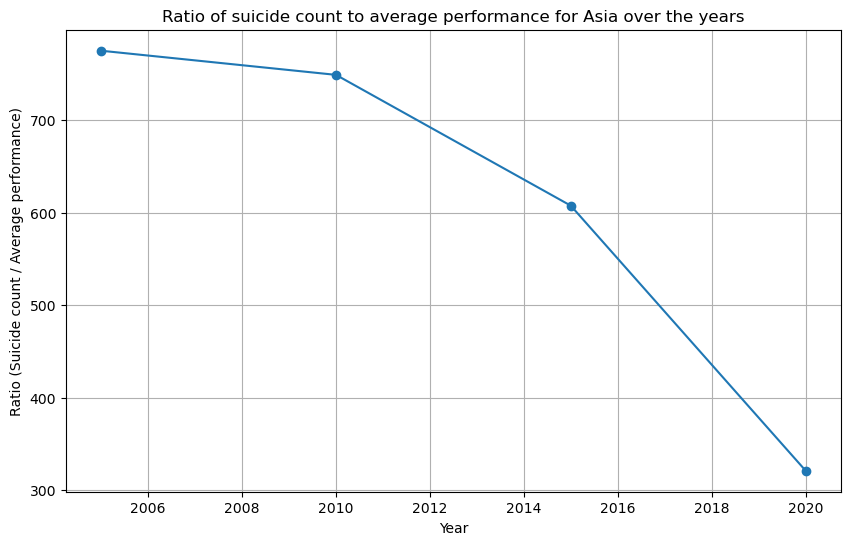

In [15]:
# Connecting to database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Query to retrieve the ratio for Asia
query = """
    SELECT Year, TotalSuicideCount * 1.0 / AveragePerformance AS Ratio
    FROM master_table_by_Region
    WHERE Region = 'ASIA';
"""

# Executing the query
cursor.execute(query)

# Fetching the results
results = cursor.fetchall()

# Extracting years and ratios from the results
years = [result[0] for result in results]
ratios = [result[1] for result in results]

# Creating the graph
plt.figure(figsize=(10, 6))
plt.plot(years, ratios, marker='o')

# Adding labels, title, and grid
plt.xlabel('Year')
plt.ylabel('Ratio (Suicide count / Average performance)')
plt.title('Ratio of suicide count to average performance for Asia over the years')
plt.grid(True)

# Diplaying the plot
plt.show()

# Closing connection
conn.close()


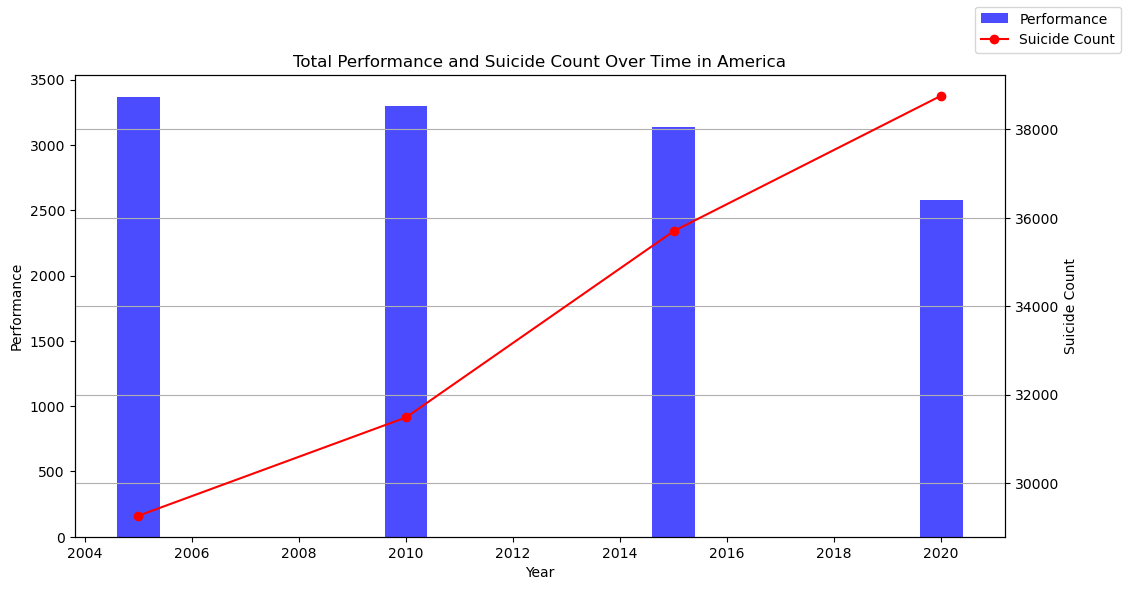

In [16]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# SQL query to retrieve the data
suicidevsperformance = """
    SELECT sr.Year, SUM(pi.Performance), sr.Region, SUM(sr.SuicideCount)
    FROM suicide_rates AS sr
    JOIN performance_indicator AS pi ON sr.Country = pi.Country AND sr.Year = pi.Year
    JOIN country_population AS cp ON sr.Country = cp.Country AND sr.Year = cp.Year
    WHERE sr.Region = 'AMERICA'
    GROUP BY sr.Region, sr.Year
    ORDER BY sr.Region, sr.Year;
"""
cursor.execute(suicidevsperformance)

# Fetch the results
results = cursor.fetchall()

# Close the database connection
conn.close()

# Extracting data from the results
years = [result[0] for result in results]
performance = [result[1] for result in results]
suicide_count = [result[3] for result in results]

# Creating a bar chart with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting performance data on the left y-axis
ax1.bar(years, performance, color='b', alpha=0.7, label='Performance')
ax1.set_xlabel('Year')
ax1.set_ylabel('Performance')
ax1.tick_params(axis='y')

# Creating a second y-axis for suicide count data on the right
ax2 = ax1.twinx()
ax2.plot(years, suicide_count, color='r', marker='o', label='Suicide Count')
ax2.set_ylabel('Suicide Count')
ax2.tick_params(axis='y')

# Let's legend
fig.legend(loc='upper right')

# Adding title and grid
plt.title('Total Performance and Suicide Count Over Time in America')
plt.grid(True)

# Showing the plot
plt.show()

#### Conclusion ####

#### Showing data from the different tables ####

In [17]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's create a query to retrieve the data
country_population = "SELECt * FROM country_population ORDER BY RANDOM() LIMIT 15;"

cursor.execute(country_population)
rows = cursor.fetchall()

# Creating a prettytable instance with the column names
table = PrettyTable()
table.field_names = ["Country", "Year", "Population"]

# Adding rows to the table
for row in rows:
    table.add_row(row)

# Printing the table
print(table)

# Closing the connexion to the database
conn.close()

+----------------+------+------------+
|    Country     | Year | Population |
+----------------+------+------------+
|    ROMANIA     | 2000 |  22448000  |
| AMERICAN SAMOA | 1995 |   54000    |
|     RWANDA     | 1995 |  5473000   |
|     POLAND     | 2000 |  38655000  |
|     MALAWI     | 1995 |  9809000   |
|   LUXEMBOURG   | 2005 |   468000   |
|     UGANDA     | 2020 |  43518000  |
|   MADAGASCAR   | 2010 |  20847000  |
|    THAILAND    | 2015 |  67977000  |
|  SOUTH KOREA   | 2000 |  46839000  |
|      CHAD      | 2020 |  12756000  |
|     JAPAN      | 2015 | 126920000  |
|  ISLE OF MAN   | 2010 |   84000    |
|   GREENLAND    | 2020 |   58000    |
| CZECH REPUBLIC | 2000 |  10269000  |
+----------------+------+------------+


In [18]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's create a query to retrieve the data
performance_indicator = "SELECt * FROM performance_indicator ORDER BY RANDOM() LIMIT 15;"

cursor.execute(performance_indicator)
rows = cursor.fetchall()

# Creating a prettytable instance with the column names
table = PrettyTable()
table.field_names = ["Country", "Year", "Performance"]

# Adding rows to the table
for row in rows:
    table.add_row(row)

# Printing the table
print(table)

# Closing the connexion to the database
conn.close()

+---------------------+------+-------------+
|       Country       | Year | Performance |
+---------------------+------+-------------+
|  BRUNEI DARUSSALAM  | 2010 |    60.86    |
|        ISRAEL       | 2010 |    74.71    |
|    LIECHTENSTEIN    | 2012 |   88.12375  |
| ST. KITTS AND NEVIS | 2016 |    34.775   |
|       ERITREA       | 2019 |   89.5525   |
|        NEPAL        | 2004 | 49.56833333 |
|       FINLAND       | 2004 |   87.46125  |
|         PERU        | 2016 | 64.23041667 |
|     NETHERLANDS     | 2008 | 78.14416667 |
|        ISRAEL       | 2014 |    74.71    |
|       CAMEROON      | 2019 | 53.47666667 |
|        PANAMA       | 2018 | 57.90833333 |
| ANTIGUA AND BARBUDA | 2007 | 44.14208333 |
|        NORWAY       | 2004 | 78.82208333 |
|       LAO PDR       | 2007 | 44.67208333 |
+---------------------+------+-------------+


In [19]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's create a query to retrieve the data
suicide_rates = "SELECt * FROM suicide_rates ORDER BY RANDOM() LIMIT 15;"

cursor.execute(suicide_rates)
rows = cursor.fetchall()

# Creating a prettytable instance with the column names
table = PrettyTable()
table.field_names = ["Region", "Country", "Year", "Gender", "Performance"]

# Adding rows to the table
for row in rows:
    table.add_row(row)

# Printing the table
print(table)

# Closing the connexion to the database
conn.close()

+---------+---------------------+------+--------+-------------+
|  Region |       Country       | Year | Gender | Performance |
+---------+---------------------+------+--------+-------------+
|  EUROPE |       ICELAND       | 1992 |  Male  |      23     |
|  EUROPE |  RUSSIAN FEDERATION | 2013 |  Male  |    23794    |
| AMERICA |        GUYANA       | 2011 |  Male  |     153     |
|   ASIA  |       GEORGIA       | 2007 | Female |      20     |
|   ASIA  |      KYRGYZSTAN     | 2001 |  Male  |     484     |
| AMERICA |      GUATEMALA      | 1993 |  Male  |     139     |
| AMERICA |      MARTINIQUE     | 2010 | Female |      5      |
|  EUROPE |       ROMANIA       | 2008 | Female |     446     |
|  EUROPE |      LITHUANIA      | 2012 |  Male  |     753     |
|  EUROPE |        ITALY        | 2001 |  Male  |     3050    |
| AMERICA | TRINIDAD AND TOBAGO | 1993 | Female |      26     |
|  EUROPE |       CZECHIA       | 1997 |  Male  |     1311    |
| AMERICA |       BARBADOS      | 1993 |

In [20]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's create a query to retrieve the data
suicide_rates = "SELECt * FROM master_table ORDER BY RANDOM() LIMIT 15;"

cursor.execute(suicide_rates)
rows = cursor.fetchall()

# Creating a prettytable instance with the column names
table = PrettyTable()
table.field_names = ["Region", "Country", "Year", "SuicideCount", "Gender", "Population", "Performance"]

# Adding rows to the table
for row in rows:
    table.add_row(row)

# Printing the table
print(table)

# Closing the connexion to the database
conn.close()

+---------+--------------------+------+--------------+--------+------------+-------------+
|  Region |      Country       | Year | SuicideCount | Gender | Population | Performance |
+---------+--------------------+------+--------------+--------+------------+-------------+
| AMERICA |       BRAZIL       | 2010 |     7379     |  Male  | 195835000  | 72.94708333 |
| AMERICA |      URUGUAY       | 2005 |     384      |  Male  |  3265000   | 66.19916667 |
|  EUROPE |      ROMANIA       | 2015 |     342      | Female |  21667000  |    70.455   |
| AMERICA |      URUGUAY       | 2010 |     126      | Female |  3302000   | 66.19916667 |
|   ASIA  |      MONGOLIA      | 2020 |      67      | Female |  3169000   | 81.85458333 |
|   ASIA  |      ARMENIA       | 2020 |      7       | Female |  3022000   | 82.93833333 |
| AMERICA |    PUERTO RICO     | 2010 |     241      |  Male  |  3722000   | 70.64958333 |
| AMERICA |     COSTA RICA     | 2005 |     233      |  Male  |  4209000   |   72.03625  |

In [21]:
# Connecting to the database
conn = sqlite3.connect(dsc540_project)
cursor = conn.cursor()

# Let's create a query to retrieve the data
master_table = "SELECt * FROM master_table_by_Region ORDER BY Year DESC, Region;"

cursor.execute(master_table)
rows = cursor.fetchall()

# Creating a prettytable instance with the column names
table = PrettyTable()
table.field_names = ["Year", "Region", "TotalSuicideCount", "TotalPopulation", "TotalPerformance", "AveragePerformance"]

# Adding rows to the table
for row in rows:
    table.add_row(row)

# Printing the table
print(table)

# Closing the connexion to the database
conn.close()

+---------+--------+-------------------+-----------------+--------------------+--------------------+
|   Year  | Region | TotalSuicideCount | TotalPopulation |  TotalPerformance  | AveragePerformance |
+---------+--------+-------------------+-----------------+--------------------+--------------------+
|  AFRICA |  2020  |        138        |     2952000     |      269.195       |      67.29875      |
| AMERICA |  2020  |       38762       |    1573829000   |   2581.27291665    | 69.76413288243243  |
|   ASIA  |  2020  |       24237       |    447412000    |      1961.54       | 75.44384615384615  |
|  EUROPE |  2020  |       43038       |    829722000    |   4268.69083332    |   85.3738166664    |
| OCEANIA |  2020  |        3139       |     47878000    |    171.45583334    |    85.72791667     |
|  AFRICA |  2015  |        594        |    163894000    |    475.78791665    | 67.96970237857143  |
| AMERICA |  2015  |       35697       |    1547029000   | 3140.5862500000003 |     62.8117